In [1]:
import numpy as np
import scipy.io as sio
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def trainImage_generator(files, batch_size = 32, sz = (256, 256)):
  
  while True: 
    
    #extract a random batch 
    batch = np.random.choice(files, size = batch_size)    
    
    #variables for collecting batches of inputs and outputs 
    batch_x = []
    batch_y = []
    # batch_z = []
    
    
    for f in batch:




        #get the masks. Note that masks are png files 
        mask = cv2.imread(f'../downloads/data4test/label/{f[:-3]}'+"png", cv2.IMREAD_GRAYSCALE).astype(np.float32)


        #preprocess the mask 
        # mask[mask >= 2] = 0 
        # mask[mask != 0 ] = 1
        


        #preprocess the raw images 
        # raw = Image.open(f'syntheticData/data/{f}')
        # raw = raw.resize(sz)
        # raw = np.array(raw)

        rawMat = sio.loadmat(f'../downloads/data4test/data/{f}')
        xData = np.array(rawMat['vxSample'])
        yData = np.array(rawMat['vySample'])

        ImgSize = xData.shape

        input_image = np.stack((xData,yData,np.zeros(xData.shape)), -1)
        # input_mask = np.stack((mask,mask,mask), -1)


        # input_image = cv2.resize(input_image, sz)
        # input_mask = cv2.resize(mask, sz)

        # flipping random horizontal or vertical
        # if random.random() > 0.5:
        #     input_image = cv2.flip(input_image,0)
        #     input_mask = cv2.flip(input_mask,0)
        # if random.random() > 0.5:
        #     input_image = cv2.flip(input_image,1)
        #     input_mask = cv2.flip(input_mask,1)


        # input_image = np.asarray(input_image)
        # input_mask = np.asarray(mask)


        # input_mask = tf.image.rgb_to_grayscale(input_mask)

        # input_image = np.asarray(input_image)
        input_mask = mask


        input_mask[input_mask != 0 ] = 1

        batch_x.append(input_image)
        batch_y.append(input_mask)
        # batch_z.append(f)


    #preprocess a batch of images and masks 
    # batch_x = np.array(batch_x)/255.
    batch_x = np.array(batch_x)
    batch_y = np.array(batch_y)
    # batch_y = np.expand_dims(batch_y,3)

    # batch_x = preprocess_input(batch_x)
    # batch_y = preprocess_input(batch_y)



    yield (batch_x, batch_y)    

In [3]:
training_files = os.listdir('../downloads/data4test/data/')
label_files = os.listdir("../downloads/data4test/label/")

high_index = len(training_files)
len(label_files), len(training_files)

(10800, 10800)

In [11]:
def visualize_random_image(training_files, label_files, aug_files, aug_labels):
    rand_ind = np.random.randint(high_index)
    mat_file_aug = sio.loadmat(file_name= f"../downloads/data4test/aug_data/{aug_files[rand_ind]}")
    label_img_aug = mpimg.imread(f"../downloads/data4test/aug_label/{aug_labels[rand_ind]}")
    mat_x_aug = mat_file_aug["vxSample"]
    mat_y_aug = mat_file_aug["vySample"]
    input_image_aug = np.stack((mat_x_aug, mat_y_aug, np.zeros(mat_x_aug.shape)), -1)
    # not-augmented data
    mat_file = sio.loadmat(file_name= f"../downloads/data4test/data/{training_files[rand_ind]}")
    label_img = mpimg.imread(f"../downloads/data4test/label/{label_files[rand_ind]}")
    mat_x = mat_file["vxSample"]
    mat_y = mat_file["vySample"]
    input_image = np.stack((mat_x, mat_y, np.zeros(mat_x.shape)), -1)

    fig = plt.figure(figsize=(15, 10))
    rows = 2
    columns = 2
    fig.add_subplot(rows, columns, 1)
    plt.imshow(input_image)
    plt.axis(False)
    plt.title("Data")
    fig.add_subplot(rows, columns, 2)
    plt.imshow(label_img)
    plt.axis(False)
    plt.title("Label")
    fig.add_subplot(rows, columns, 3)
    plt.imshow(input_image_aug)
    plt.axis(False)
    fig.add_subplot(rows, columns, 4)
    plt.imshow(label_img_aug)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


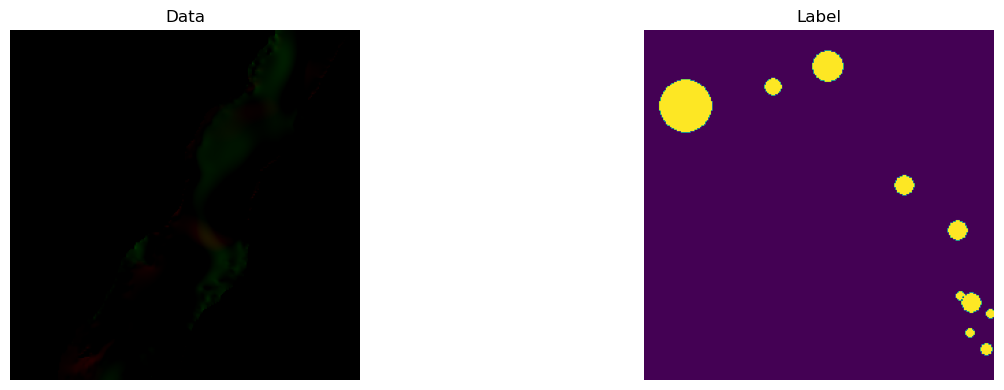

In [10]:
augmented_data = os.listdir("../downloads/data4test/aug_data/")
augmented_label = os.listdir("../downloads/data4test/aug_label/")
visualize_random_image(training_files=augmented_data, label_files=augmented_label)